### `Name` : Ayush Panchal

### `Roll No` : P24DS013

# 1. Importing Necessary Libraries

In [1]:
# Basic maths, statistical and dataframe related libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For LR Model and Train test split function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# MSE for continuous data
from sklearn.metrics import mean_squared_error

# 2. Data Loading

In [2]:
iris_data = pd.read_csv("/kaggle/input/iris/Iris.csv") 
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Exploratory Data Analysis

In [3]:
iris_data.shape

(150, 6)

In [4]:
# To show statistical data of numeric columns
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Metadata of all columns
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking if there is any null values in dataset
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Analysis of independent variables

In [7]:
# Analyze top 5 rows
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


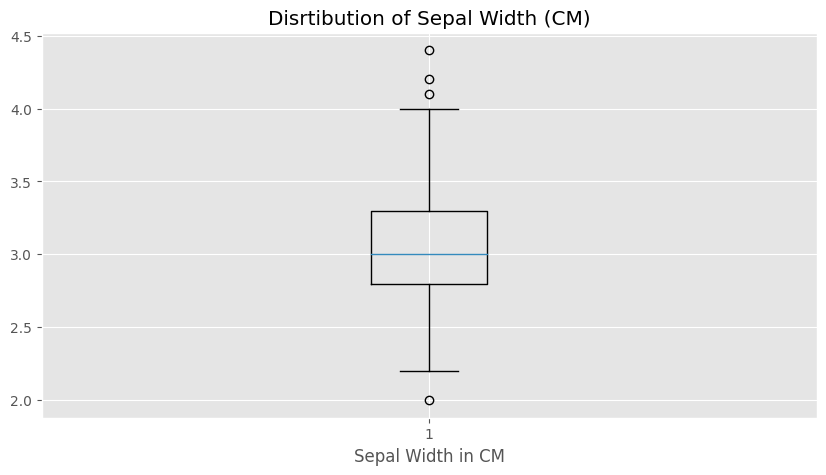

In [8]:
plt.style.use("ggplot") # Using ggplot graph style
plt.figure(figsize = (10 , 5))
plt.title("Disrtibution of Sepal Width (CM)")
plt.xlabel("Sepal Width in CM")
plt.boxplot(iris_data["SepalWidthCm"]); 

### We can see some outliers in Sepal Width (CM), but they're not actually outliers

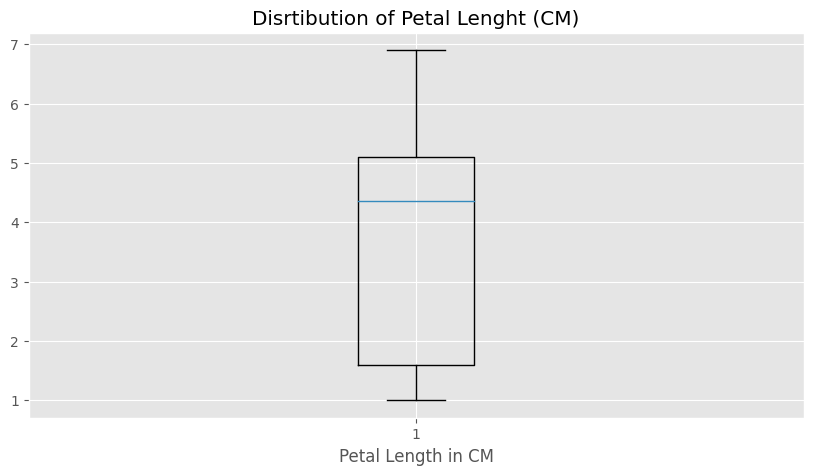

In [9]:
plt.figure(figsize = (10 , 5))
plt.title("Disrtibution of Petal Lenght (CM)")
plt.xlabel("Petal Length in CM")
plt.boxplot(iris_data["PetalLengthCm"]);

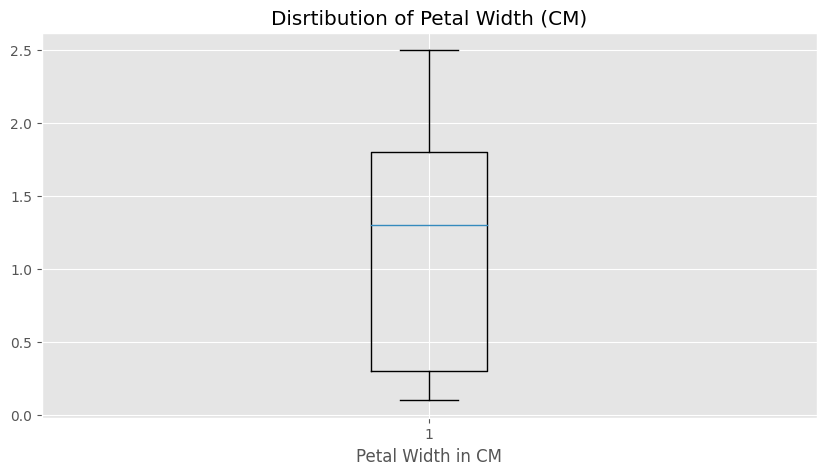

In [10]:
plt.figure(figsize = (10 , 5))
plt.title("Disrtibution of Petal Width (CM)")
plt.xlabel("Petal Width in CM")
plt.boxplot(iris_data["PetalWidthCm"]);

## Piechart to analyze if dataset is balanced or not!

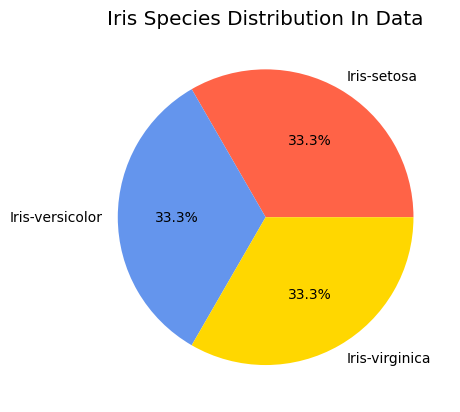

In [11]:
species = iris_data.groupby(["Species"]).count()["Id"]
plt.title("Iris Species Distribution In Data")
plt.pie(species, labels = species.index, autopct='%1.1f%%', colors = [ 'tomato', 'cornflowerblue', 'gold']);

### Dataset is completely balanced for all iris species

## Correlation Matrix

### One-hot encoding

> Machine doesn't understand categories as a data, but only numbers. so we will convert the categorical feature into numbers using one hot encoding

In [12]:
one_hot_encoded_data = pd.get_dummies(iris_data.drop("Id", axis = 1), columns = ["Species"])
one_hot_encoded_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [13]:
corr_matrix = round(one_hot_encoded_data.corr(),2) # Creating correlation matrix of the data columns
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
SepalLengthCm,1.00,-0.11,0.87,0.82,-0.72,0.08,0.64
SepalWidthCm,-0.11,1.00,-0.42,-0.36,0.60,-0.46,-0.13
PetalLengthCm,0.87,-0.42,1.00,0.96,-0.92,0.20,0.72
PetalWidthCm,0.82,-0.36,0.96,1.00,-0.89,0.12,0.77
Species_Iris-setosa,-0.72,0.60,-0.92,-0.89,1.00,-0.50,-0.50
Species_Iris-versicolor,0.08,-0.46,0.20,0.12,-0.50,1.00,-0.50
Species_Iris-virginica,0.64,-0.13,0.72,0.77,-0.50,-0.50,1.00


### Plotting the correlation matrix as a heatmap

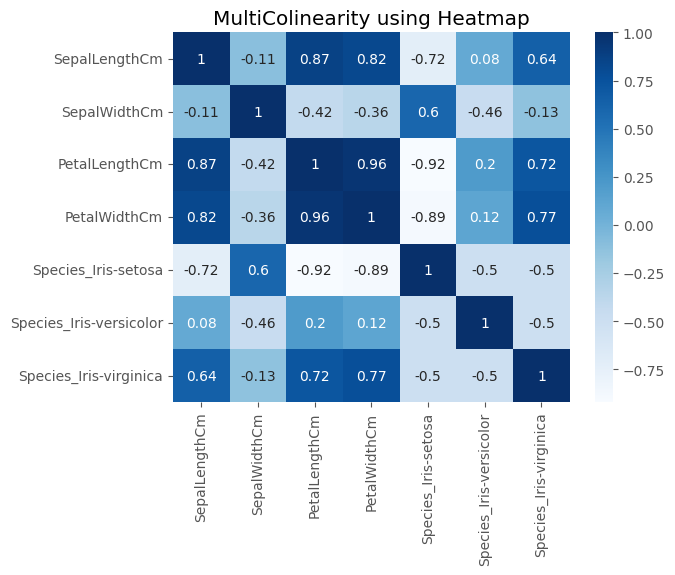

In [14]:
cmap = "Blues"
plt.title("MultiColinearity using Heatmap")
sns.heatmap(corr_matrix, cmap=cmap, annot = True);

# 4. Using Linear Regression

## Splitting The Data into Training and Testing

In [15]:
X = one_hot_encoded_data.drop(["SepalLengthCm"], axis = 1) # Selecting only input features
y = one_hot_encoded_data[["SepalLengthCm"]] # Selecting only output features

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20) # Splitting the dataset into 4 parts
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## Fitting the model

In [17]:
model = LinearRegression() # Creating the object for linear regression

model.fit(X_train, y_train) # Fitting the model on training data

LinearRegression()

## Making predictions on testing data

In [18]:
y_preds = model.predict(X_test) # Predicting on test data after model training

## Evaluating model using 2 different metrics

In [19]:
accuracy = model.score(X_test, y_test) # Accuracy of a model
mse = mean_squared_error(y_preds, y_test) # Mean squared error
accuracy, mse

(0.866372050452402, 0.092238919307722)

In [20]:
f"Accuracy = {round(accuracy, 2) * 100} %"

'Accuracy = 87.0 %'